In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV file
file_path = 'ionosphere-351-32.csv'
data = pd.read_csv(file_path)




In [10]:
# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.

# Perform RFE with cross-validated selection of the best number of features
cv = StratifiedKFold(n_splits=5)  # 5-fold cross-validation
rfe = RFE(estimator=svm_classifier, step=1)
selector = rfe.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Print selected feature indices
selected_feature_indices = selector.support_
print("Selected Feature Indices:", selected_feature_indices)

# Print the names of selected features
selected_feature_names = X.columns[selected_feature_indices]
print("Selected Feature Names:", selected_feature_names)


Selected Feature Indices: [ True False  True  True  True  True False False False  True False  True
 False  True False  True  True False  True  True  True False False  True
  True False False False False  True False False]
Selected Feature Names: Index(['0.997695', '0.926215', '0.51153', '0.91699', '0.31146', '0.411225',
       '0.275275', '0.308885', '0.30729', '0.79106', '0.784855', '0.35163',
       '0.68473', '0.244145', '0.70539', '0.227565'],
      dtype='object')


In [11]:

# Train the SVM classifier with selected features
svm_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set with selected features
predictions_selected = svm_classifier.predict(X_test_selected)

# Calculate accuracy after feature selection
accuracy_selected = accuracy_score(y_test, predictions_selected)
print(f'Accuracy after Feature Selection: {accuracy_selected * 100:.2f}%')

# Make predictions on the test set without feature selection
svm_classifier_full = SVC(kernel='linear')
svm_classifier_full.fit(X_train, y_train)
predictions_full = svm_classifier_full.predict(X_test)

# Calculate accuracy before feature selection
accuracy_full = accuracy_score(y_test, predictions_full)
print(f'Accuracy before Feature Selection: {accuracy_full * 100:.2f}%')


Accuracy after Feature Selection: 81.43%
Accuracy before Feature Selection: 78.57%


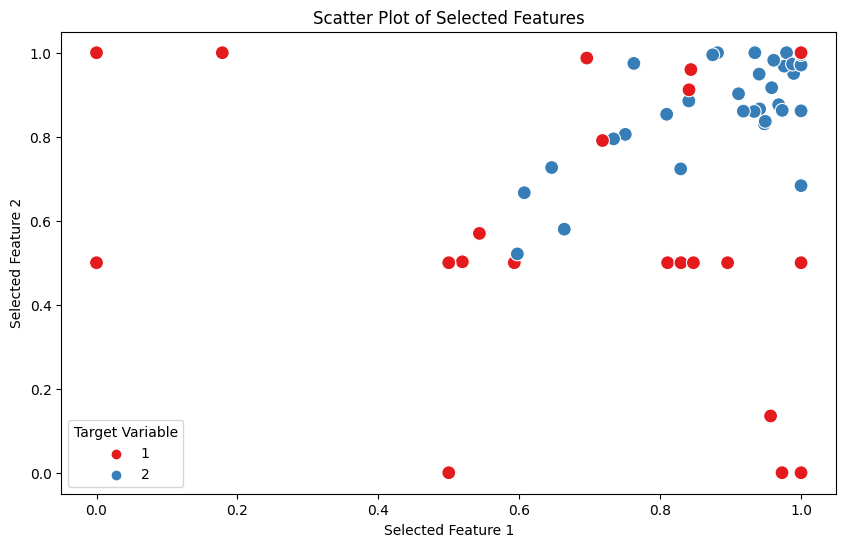

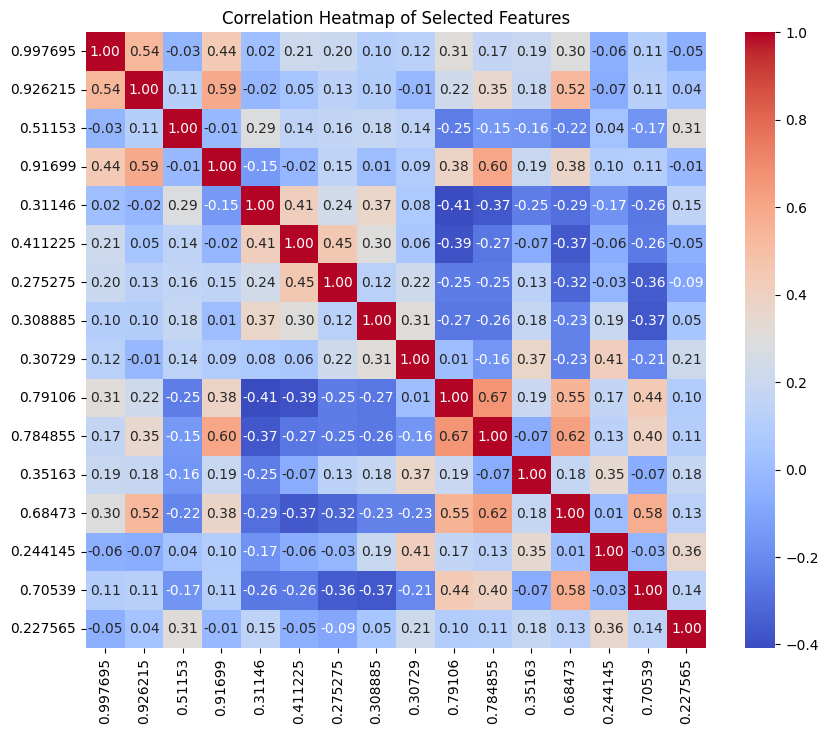

In [12]:

# Plot a scatter plot for two selected features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_selected[:, 0], y=X_test_selected[:, 1], hue=y_test, palette='Set1', s=100)
plt.title('Scatter Plot of Selected Features')
plt.xlabel('Selected Feature 1')
plt.ylabel('Selected Feature 2')
plt.legend(title='Target Variable')
plt.show()

# Plot a heatmap for the correlation matrix of selected features
correlation_matrix = pd.DataFrame(X_train_selected, columns=selected_feature_names).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.show()